# Market Basket Analysis Using the Apriori Algorithm

Market Basket Analysis is a data mining technique used in retail to discover association and patterns in customers' purchasing
behaviour. The goal is to identify which items are frequently purchased together and to use this information

It can also be defined as a data mining technique used to identify relationships between products frequently purchased together by analysing transaction data from retail stores or e-commerce websites.

It can help retailers and marketers better understand customer behavior and preferences.

## Apriori 

Apriori is one of the most popular algorithms for performing market basket analysis. It works by iteratively generating frequent itemsets, or sets of items that appear together in a significant number of transactions. It uses a minimum support threshold to determine which itemsets are frequent and can be used to generate association rules.

**Association rules** are a type of machine learning method used to identify interesting relationships between items in a datset. They consist of an **Antecedents** - a set of items that are present in the transaction, and a **Consequent** - a set of items oftem purchased together with the antecedent.

The strength of an association rule can be measured using several metrics, the primary ones being:
1. Support
2. Confidence
3. Lift

**Support** : this is a key metric used in Aprior algorithm, which is a popular method for finding frequent itemsets in transactional data. In simple terms, it measures how frequently an itemset appears in a dataset of transactions.
>Support(item) = Transactions comprising the item / Total transactions

> A high support value (0.5 or 50% and above) indicates that the item is present in most purchases, therefore marketers should focus on it more.

The support of an itemset is the frequency of occurence of that itemset in the dataset. It measures the popularity of an itemset in the dataset.

**Confidence** : confidence measures the strength of association between two (2) items A & B in an itemset. It is the ratio of the number of transactions that contain both A & B to the number of transactions that contain A.
>Confidence(A/B) = Transactions comprising A and B / Transactions comprising A

A high confidence is always good. Confidence indicates the strength of the implication of the rule. Higher confidence of >80% is preferable.

**Lift** : lift measures the degree of associations between two (2) items A & B in an itemselt, compared to what would be expected if they were independent.
>Lift = Confidence(A->B) / Support(A)

A lift value greater than 1 indicates that the 2 items are positively correlated, while a lift value less than 1 indicates negative correlation.
This can help store managers to decide the product placement on the isle

Confidence and Lift help determing the strength and directionality of relationships between the items

Other metrics include:
1. Leverage: measures the differnece between the actual frequency of co-occurrence of 2 items and the difference that would be expected if they were independent. It ranges from -1 to 1, with values closer to 1 indicating a stronger association.

In simpler terms, it measures how much more often two (2) items occur together than you would expect by chance. A high leverage means two (2) items are strongly associated with each other, while a low leverage value means that they are less likely to occur together

2. Conviction: conviction measures the degree of dependence between two (2) items A & B in an itemset. It is the ratio of the expected frequency of A occuring without B to the actual frequency of A occuring without B.

**SUMMARY**

>The support of a rule is the proportion of transactions that contain both the antecedent and the consequent.

>The confidence of a rule is the proportion of transactions containing the antecedent that also contain the consequent.

>The lift of a rule is the ratio of the observed support to the expected support if the antecedent and consequent were independen

In [49]:
#importing essential libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
groceries = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')
groceries.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [51]:
#checking for missing values

groceries.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [53]:
#checking data summary info to validate

groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [52]:
groceries.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [54]:
#data type conversion

groceries['date'] = pd.to_datetime(groceries['Date'], format='%d-%m-%Y')
groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


In [55]:
#checking for size of data (number of rows & cols)

groceries.shape

(38765, 4)

In [56]:
#checking for duplicates

groceries.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38760    False
38761    False
38762    False
38763    False
38764    False
Length: 38765, dtype: bool

In [57]:
groceries = groceries.drop_duplicates(ignore_index = True)

groceries

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-01-05
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-02-01
...,...,...,...,...
38001,4471,08-10-2014,sliced cheese,2014-10-08
38002,2022,23-02-2014,candy,2014-02-23
38003,1097,16-04-2014,cake bar,2014-04-16
38004,1510,03-12-2014,fruit/vegetable juice,2014-12-03


Removing duplicates dropped a total of 759 rows from our dataset. 

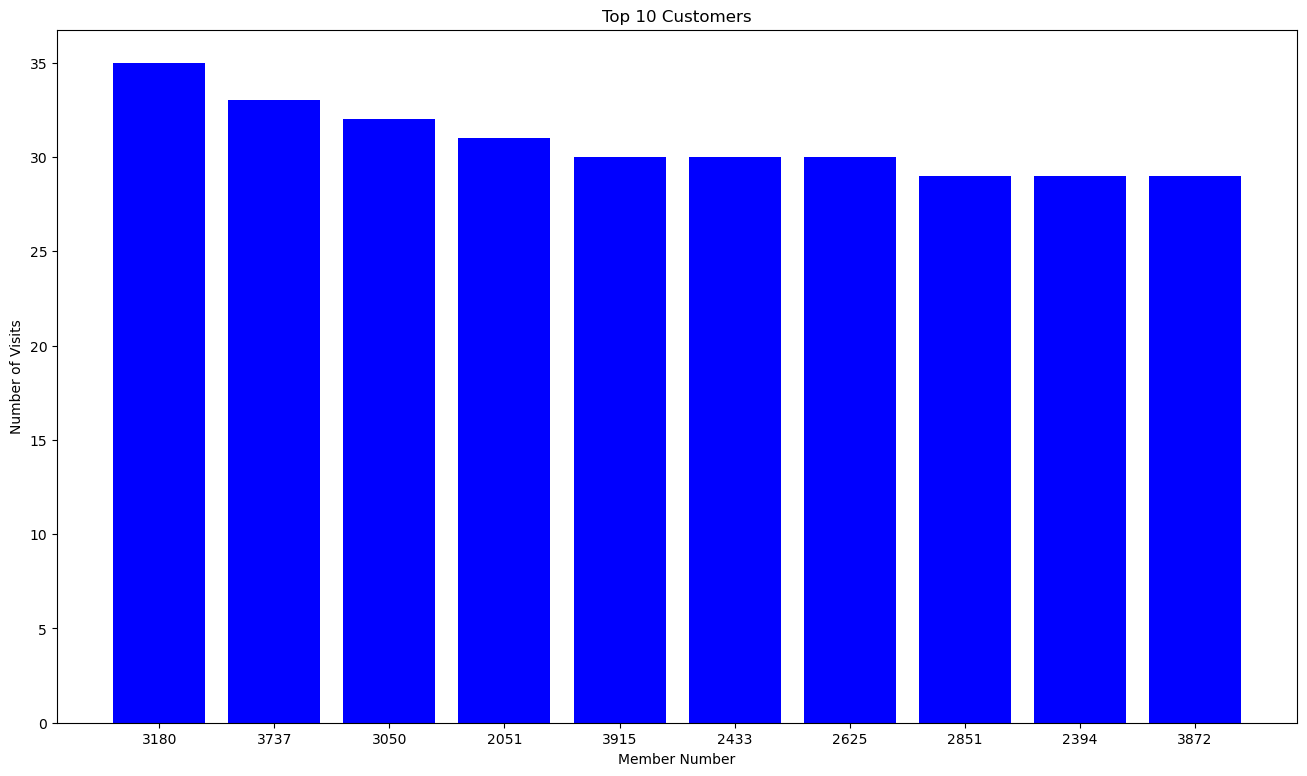

In [58]:
top_10_customers = groceries['Member_number'].value_counts().head(10)
plt.figure(figsize = (16, 9))

plt.bar(top_10_customers.index.astype(str), top_10_customers.values, color='blue')
plt.title('Top 10 Customers')
plt.xlabel('Member Number')
plt.ylabel('Number of Visits')
plt.show()

In [59]:
#checking the number of times eat item appears on the transaction sheet

groceries['itemDescription'].value_counts()

itemDescription
whole milk               2363
other vegetables         1827
rolls/buns               1646
soda                     1453
yogurt                   1285
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

itemDescription
whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: count, dtype: int64


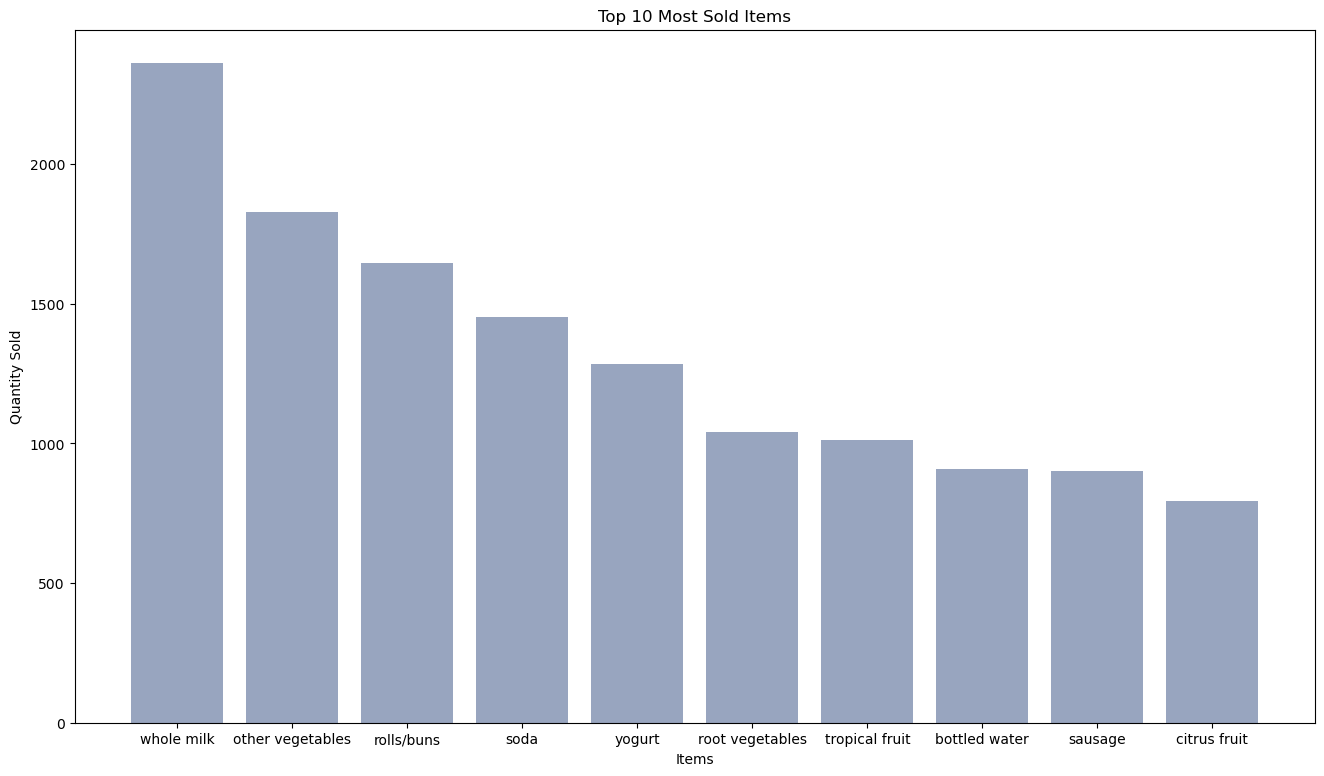

In [72]:
top_10_items = groceries['itemDescription'].value_counts().head(10)
print(top_10_items)
plt.figure(figsize = (16,9))

plt.bar(top_10_items.index, top_10_items.values, color = (0.2, 0.3, 0.5, 0.5))
plt.title('Top 10 Most Sold Items')
plt.xlabel('Items')
plt.ylabel('Quantity Sold')
plt.show()

In [61]:
#setting date as index

groceries_date = groceries.set_index(['Date'])
groceries_date

,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-01-05
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-02-01
...,...,...,...
08-10-2014,4471,sliced cheese,2014-10-08
23-02-2014,2022,candy,2014-02-23
16-04-2014,1097,cake bar,2014-04-16


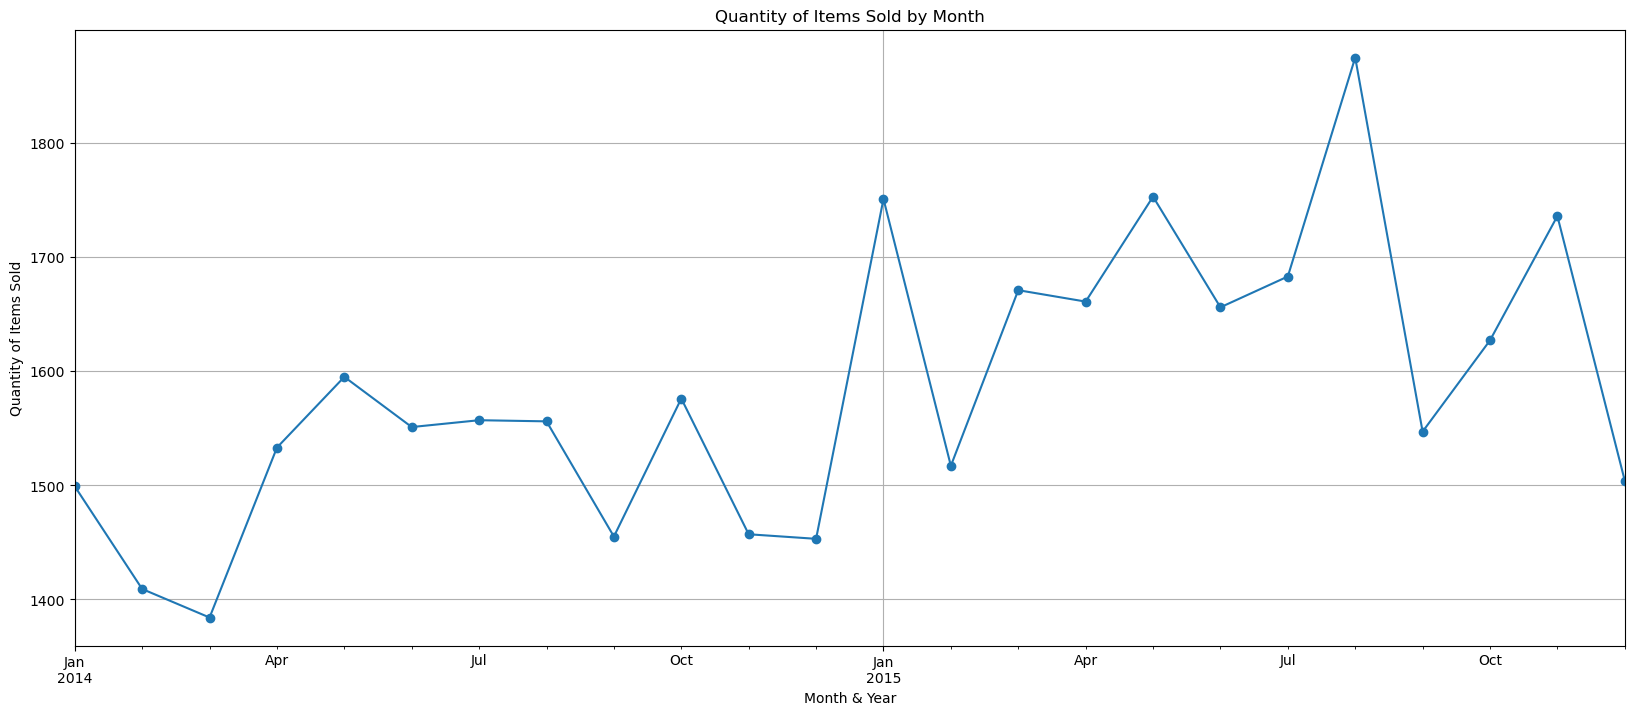

In [62]:
itemCount_byMonth = groceries_date.groupby(groceries_date['date'].dt.to_period('M'))['itemDescription'].count()

#plot results
itemCount_byMonth.plot(figsize = (20,8), grid = True, marker = 'o')
plt.title('Quantity of Items Sold by Month')
plt.xlabel('Month & Year')
plt.ylabel('Quantity of Items Sold')
plt.show()

In [63]:
cust_level = groceries.groupby('Member_number')['itemDescription'].count()
cust_level= cust_level.sort_values(ascending = False)
cust_level.head()

Member_number
3180    35
3737    33
3050    32
2051    31
2433    30
Name: itemDescription, dtype: int64

In [64]:
groceries['single_transaction'] = groceries['Member_number'].astype(str)+'_'+groceries['Date'].astype(str)
groceries.head()

,Member_number,Date,itemDescription,date,single_transaction
0,1808,21-07-2015,tropical fruit,2015-07-21,1808_21-07-2015
1,2552,05-01-2015,whole milk,2015-01-05,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2015-09-19,2300_19-09-2015
3,1187,12-12-2015,other vegetables,2015-12-12,1187_12-12-2015
4,3037,01-02-2015,whole milk,2015-02-01,3037_01-02-2015


The "single_transaction" variable combines the member number and the date. This tells us the item purchased in one receipt.

In [65]:
#pivoting the table to convert items into columns and the transactions into rows

groceries2 = pd.crosstab(groceries['single_transaction'], groceries['itemDescription'])
groceries2.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This "Groceries2" table tells us how many times each item has been purchases in one single transaction

With over a hundred columns, the table shows that most people only buy 2 - 3 items. As a result, it is mostlyfilled with zeros.

In the final step of data pre-processing, all values in the dataframe are encoded to 0 and 1.

This means that even if there are multiple instances of the same item in a transaction, the value will be encoded to 1 since market basket analysis does not consider purchase frequency.

In [46]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res

basket_entry = groceries2.applymap(encode)

In [67]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

freq_itemsets = apriori(basket_entry, min_support = 0.001, use_colnames = True)
rules = association_rules(freq_itemsets, metric = 'lift')

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
4,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371,-0.121998


From the table above, we can see that the **antecedents** and **consequents** colums show items that are frequently purchased together.
The 1st row of the dataset show us that if a person were to but UHT-milk, then they are also likely to purchase bottled water.

We will sort the dataset by **Support, Confidence and Lift** to get the most frequent item combinations in the whole dataset.

In [68]:
rules.sort_values(['support', 'confidence', 'lift'], axis = 0, ascending = False).head(8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
622,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
623,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
694,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
695,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
551,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
550,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
649,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
648,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


The resulting table shows that the four most popular product combinations that are frequently bought together are:

>**Rolls/buns and Whole milk**

>**Yogurt and Whole milk**

>**Soda and Other Vegetables**

>**Sausage and Whole milk**

Possible factors responsible for the prevalence include:
> Isle arrangement: these products might have been placed within the same line of sight to up sales

> Products might have been on discounted sales within that period

## Conclusion

Market Basket Analysis was successfully performed on the Groceries dataset and cross-selling opportunities have been identified. By looking at **antecendents** and **consequents**, the business can cross-sell consequents to those customers who have purchased the items in the antecendents.